<a href="https://colab.research.google.com/github/Zahramashayekhpour/Python/blob/master/color_image_feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import os
#import mahotas as mt
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops
from skimage.measure import shannon_entropy
from scipy.stats import skew
from scipy.stats import kurtosis
from skimage.filters import gabor
from PIL import Image, ImageStat


In [ ]:
from google.colab import drive   ## allow Colab to connect your Drive
root = '/content/gdrive/'
drive.mount( root )

Mounted at /content/gdrive/


# 1- Read RGB images and extract color-moment features

In [ ]:
DATADIR="/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total"
CATEGORIES = os.listdir(DATADIR)
print(CATEGORIES)
Organic_DATADIR = "/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic"
Non_Organic_DATADIR = "/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/non-organic"


['organic', 'non-organic']


In [ ]:
images_name=pd.DataFrame()

path=Organic_DATADIR
Organic_filenames = [os.path.basename(os.path.join(path, x)) for x in os.listdir(path) if '.png' in x or '.jpg' in x]
df1 = pd.DataFrame()
df1['class'] = pd.Series([0 for x in range(len(Organic_filenames))])
df1['images_name']=Organic_filenames

path=Non_Organic_DATADIR
Non_organic_filenames = [os.path.basename(os.path.join(path, x)) for x in os.listdir(path) if '.png' in x or '.jpg' in x]
df2 = pd.DataFrame()
df2['class'] = pd.Series([1 for x in range(len(Non_organic_filenames))])
df2['images_name']=Non_organic_filenames


images_name=pd.concat([df1,df2],axis=0)
images_name

,class,images_name
0,0,12.jpg
1,0,11.jpg
2,0,23.jpg
3,0,25.jpg
4,0,27.jpg
...,...,...
263,1,260.jpg
264,1,248.jpg
265,1,235.jpg
266,1,237.jpg


In [ ]:
#Resize images to
#SIZE = 128      ##resize all the images into same size

#Capture images and labels into arrays.
#Start by creating empty lists.
images = []
labels = []
#for directory_path in glob.glob("cell_images/train/*"):
for directory_path in glob.glob("/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/*"):
    label = directory_path.split("\\")[-1]
    path = os.path.normpath(label)
    print(path)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)

        img = cv2.imread(img_path, cv2.IMREAD_COLOR) #Reading color images
        #img = cv2.resize(img, (340, 420)) #Resize images
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(label)
        ## above codes gives us a list of array

images = np.array(images)
labels = np.array(labels)

/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/12.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/11.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/23.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/25.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/27.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/14.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/5.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/35.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/26.jpg
/content/gdrive/MyDrive/thesis/total-dataset(aft

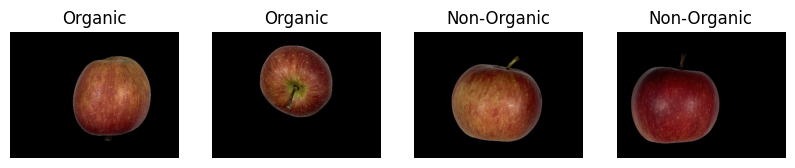

In [ ]:
import matplotlib.pyplot as plt   ## it;s better to see the images at the first to make sure, they read correctly
from matplotlib.pyplot import imshow

# Display 3 images
plt.figure(figsize=(10,3))
plt.subplot(141)
plt.imshow(images[42,:,:,:])
plt.title("Organic")
plt.axis("off")
plt.subplot(142)
plt.imshow(images[72,:,:,:])
plt.title("Organic")
plt.axis("off")
###############################
plt.subplot(143)
plt.imshow(images[377,:,:,:])
plt.title("Non-Organic")
plt.axis("off")
plt.subplot(144)
plt.imshow(images[406,:,:,:])
plt.title("Non-Organic")
plt.axis("off")
# show the plot
plt.show()

In [ ]:
images.shape

(550, 433, 577, 3)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import plotly.figure_factory as ff

# Check the distribution of red values
red_means = []
red_stds = []
red_skews = []
for i in range(len(images)):
  red_mean = np.mean(images[i][:, :, 0])
  red_means.append(red_mean)

  red_std = np.std(images[i][:, :, 0])
  red_stds.append(red_std)

  red_skew = skew(images[i][:, :, 0],axis=None, bias=True)
  red_skews.append(red_skew)

# Check the distribution of green values
green_means = []
green_stds = []
green_skews = []
for i in range(len(images)):
  green_mean = np.mean(images[i][:, :, 1])
  green_means.append(green_mean)

  green_std = np.std(images[i][:, :, 1])
  green_stds.append(green_std)

  green_skew = skew(images[i][:, :, 1],axis=None, bias=True)
  green_skews.append(green_skew)

# Check the distribution of blue values
blue_means = []
blue_stds = []
blue_skews = []
for i in range(len(images)):
  blue_mean = np.mean(images[i][:, :, 2])
  blue_means.append(blue_mean)

  blue_std = np.std(images[i][:, :, 2])
  blue_stds.append(blue_std)

  blue_skew = skew(images[i][:, :, 2],axis=None, bias=True)
  blue_skews.append(blue_skew)

# Plotting the histogram
fig = ff.create_distplot([red_means, green_means, blue_means], group_labels=["R", "G", "B"], colors=['red', 'green', 'blue'])
fig.update_layout(showlegend=True, template="simple_white")
fig.update_layout(title_text='Distribution of channel values across images in RGB')
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig.data[1].marker.line.color = 'rgb(0, 0, 0)'
fig.data[1].marker.line.width = 0.5
fig.data[2].marker.line.color = 'rgb(0, 0, 0)'
fig.data[2].marker.line.width = 0.5
fig

In [ ]:
RGB_color_moment=pd.DataFrame()
RGB_color_moment['r_means']=red_means
RGB_color_moment['r_stds']=red_stds
RGB_color_moment['r_skews']=red_skews
RGB_color_moment['g_means']=green_means
RGB_color_moment['g_stds']=green_stds
RGB_color_moment['g_skew']=green_skews
RGB_color_moment['b_means']=blue_means
RGB_color_moment['b_stds']=blue_stds
RGB_color_moment['b_skews']=blue_skews
RGB_color_moment

,r_means,r_stds,r_skews,g_means,g_stds,g_skew,b_means,b_stds,b_skews
0,18.369419,38.955566,1.863447,8.505782,19.681548,2.570421,8.342998,18.850259,2.392047
1,18.940506,40.277912,1.875848,10.028714,23.035377,2.507056,10.557683,23.250328,2.209536
2,29.398141,54.386609,1.486648,16.044873,31.688401,1.838579,10.369719,21.174706,2.136762
3,24.133557,48.161234,1.661953,11.362515,23.565203,1.944298,10.351159,21.147165,1.923715
4,34.835435,63.884729,1.435456,23.477816,44.640683,1.654623,11.804856,23.769170,2.013067
...,...,...,...,...,...,...,...,...,...
545,44.953855,68.927533,1.084107,24.440060,41.675795,1.671868,15.866611,26.772964,1.607057
546,40.469010,64.740755,1.076979,26.330934,42.598203,1.171480,22.716043,36.653344,1.151662
547,36.005928,61.030987,1.332269,17.383412,32.483436,1.846628,13.022022,24.699250,1.979134
548,43.580101,70.251233,1.243139,20.296096,36.734738,1.889524,13.496324,24.322950,1.815504


# 2- Read HSV images and extract color-moment features

In [ ]:
#Resize images to
#SIZE = 128      ##resize all the images into same size

#Capture images and labels into arrays.
#Start by creating empty lists.
images = []
labels = []
#for directory_path in glob.glob("cell_images/train/*"):
for directory_path in glob.glob("/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/*"):
    label = directory_path.split("\\")[-1]
    path = os.path.normpath(label)
    print(path)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)

        img = cv2.imread(img_path, cv2.IMREAD_COLOR) #Reading color images
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        #img = cv2.resize(img, (340, 420)) #Resize images
        images.append(img)
        labels.append(label)
        ## above codes gives us a list of array

images = np.array(images)
labels = np.array(labels)

/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/12.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/11.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/23.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/25.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/27.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/14.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/5.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/35.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/26.jpg
/content/gdrive/MyDrive/thesis/total-dataset(aft

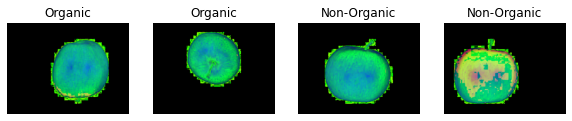

In [ ]:
import matplotlib.pyplot as plt   ## it;s better to see the images at the first to make sure, they read correctly
from matplotlib.pyplot import imshow

# Display 3 images
plt.figure(figsize=(10,3))
plt.subplot(141)
plt.imshow(images[42,:,:,:])
plt.title("Organic")
plt.axis("off")
plt.subplot(142)
plt.imshow(images[72,:,:,:])
plt.title("Organic")
plt.axis("off")
###############################
plt.subplot(143)
plt.imshow(images[377,:,:,:])
plt.title("Non-Organic")
plt.axis("off")
plt.subplot(144)
plt.imshow(images[406,:,:,:])
plt.title("Non-Organic")
plt.axis("off")
# show the plot
plt.show()

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import plotly.figure_factory as ff

# Check the distribution of h values
h_means = []
h_stds = []
h_skews = []
for i in range(len(images)):
  h_mean = np.mean(images[i][:, :, 0])
  h_means.append(h_mean)

  h_std = np.std(images[i][:, :, 0])
  h_stds.append(h_std)

  h_skew = skew(images[i][:, :, 0],axis=None, bias=True)
  h_skews.append(h_skew)

# Check the distribution of s values
s_means = []
s_stds = []
s_skews = []
for i in range(len(images)):
  s_mean = np.mean(images[i][:, :, 1])
  s_means.append(s_mean)

  s_std = np.std(images[i][:, :, 1])
  s_stds.append(s_std)

  s_skew = skew(images[i][:, :, 1],axis=None, bias=True)
  s_skews.append(s_skew)

# Check the distribution of v values
v_means = []
v_stds = []
v_skews = []
for i in range(len(images)):
  v_mean = np.mean(images[i][:, :, 2])
  v_means.append(v_mean)

  v_std = np.std(images[i][:, :, 2])
  v_stds.append(v_std)

  v_skew = skew(images[i][:, :, 2],axis=None, bias=True)
  v_skews.append(v_skew)

# Plotting the histogram
fig = ff.create_distplot([h_means, s_means, v_means], group_labels=["H", "S", "V"], colors=['red', 'green', 'blue'])
fig.update_layout(showlegend=True, template="simple_white")
fig.update_layout(title_text='Distribution of channel values across images in HSV')
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig.data[1].marker.line.color = 'rgb(0, 0, 0)'
fig.data[1].marker.line.width = 0.5
fig.data[2].marker.line.color = 'rgb(0, 0, 0)'
fig.data[2].marker.line.width = 0.5
fig

In [ ]:
HSV_color_moment=pd.DataFrame()
HSV_color_moment['h_means']=h_means
HSV_color_moment['h_stds']=h_stds
HSV_color_moment['h_skews']=h_skews
HSV_color_moment['s_means']=s_means
HSV_color_moment['s_stds']=s_stds
HSV_color_moment['s_skew']=s_skews
HSV_color_moment['v_means']=v_means
HSV_color_moment['v_stds']=v_stds
HSV_color_moment['v_skews']=v_skews
HSV_color_moment

,h_means,h_stds,h_skews,s_means,s_stds,s_skew,v_means,v_stds,v_skews
0,15.847035,49.363702,2.910297,33.267670,67.467683,1.771066,18.385413,38.948780,1.863420
1,28.540984,63.998822,1.846427,29.463727,61.290856,1.940058,18.956460,40.271244,1.875807
2,4.314908,17.675682,7.799127,46.013224,79.659232,1.288328,29.423962,54.373938,1.486611
3,10.242874,38.975580,3.898778,37.543926,70.361369,1.539938,24.159033,48.149644,1.661901
4,5.202016,14.172847,6.178378,48.243023,81.917045,1.235243,34.873832,63.865531,1.435404
...,...,...,...,...,...,...,...,...,...
545,5.477228,21.207512,6.701785,58.671263,84.946677,0.905067,44.991034,68.932257,1.083974
546,3.256963,13.565750,8.894990,37.640211,61.068609,1.454746,40.494787,64.735184,1.077058
547,8.196337,32.524702,4.754077,51.679052,82.728617,1.136320,36.027882,61.018641,1.332341
548,5.896822,24.755592,6.155346,59.979051,89.293419,0.949780,43.605237,70.236387,1.243230


# 3- Read RGB images and convert to LAB  and extract color-moment features

In [ ]:
#Resize images to
#SIZE = 128      ##resize all the images into same size

#Capture images and labels into arrays.
#Start by creating empty lists.
images = []
labels = []
#for directory_path in glob.glob("cell_images/train/*"):
for directory_path in glob.glob("/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/*"):
    label = directory_path.split("\\")[-1]
    path = os.path.normpath(label)
    print(path)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)

        img = cv2.imread(img_path, cv2.IMREAD_COLOR) #Reading color images
        img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        #img = cv2.resize(img, (340, 420)) #Resize images
        images.append(img)
        labels.append(label)
        ## above codes gives us a list of array

images = np.array(images)
labels = np.array(labels)

/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/12.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/11.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/23.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/25.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/27.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/14.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/5.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/35.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/26.jpg
/content/gdrive/MyDrive/thesis/total-dataset(aft

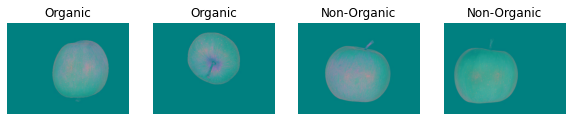

In [ ]:
import matplotlib.pyplot as plt   ## it;s better to see the images at the first to make sure, they read correctly
from matplotlib.pyplot import imshow

# Display 3 images
plt.figure(figsize=(10,3))
plt.subplot(141)
plt.imshow(images[42,:,:,:])
plt.title("Organic")
plt.axis("off")
plt.subplot(142)
plt.imshow(images[72,:,:,:])
plt.title("Organic")
plt.axis("off")
###############################
plt.subplot(143)
plt.imshow(images[377,:,:,:])
plt.title("Non-Organic")
plt.axis("off")
plt.subplot(144)
plt.imshow(images[406,:,:,:])
plt.title("Non-Organic")
plt.axis("off")
# show the plot
plt.show()

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import plotly.figure_factory as ff

# Check the distribution of L values
L_means = []
L_stds = []
L_skews = []
for i in range(len(images)):
  L_mean = np.mean(images[i][:, :, 0])
  L_means.append(L_mean)

  L_std = np.std(images[i][:, :, 0])
  L_stds.append(L_std)

  L_skew = skew(images[i][:, :, 0],axis=None, bias=True)
  L_skews.append(L_skew)

# Check the distribution of s values
a_means = []
a_stds = []
a_skews = []
for i in range(len(images)):
  a_mean = np.mean(images[i][:, :, 1])
  a_means.append(a_mean)

  a_std = np.std(images[i][:, :, 1])
  a_stds.append(a_std)

  a_skew = skew(images[i][:, :, 1],axis=None, bias=True)
  a_skews.append(a_skew)

# Check the distribution of b values
b_means = []
b_stds = []
b_skews = []
for i in range(len(images)):
  b_mean = np.mean(images[i][:, :, 2])
  b_means.append(b_mean)

  b_std = np.std(images[i][:, :, 2])
  b_stds.append(b_std)

  b_skew = skew(images[i][:, :, 2],axis=None, bias=True)
  b_skews.append(b_skew)

# Plotting the histogram
fig = ff.create_distplot([L_means, a_means, b_means], group_labels=["L", "a", "b"], colors=['red', 'green', 'blue'])
fig.update_layout(showlegend=True, template="simple_white")
fig.update_layout(title_text='Distribution of channel values across images in LAB')
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig.data[1].marker.line.color = 'rgb(0, 0, 0)'
fig.data[1].marker.line.width = 0.5
fig.data[2].marker.line.color = 'rgb(0, 0, 0)'
fig.data[2].marker.line.width = 0.5
fig

In [ ]:
LAB_color_moment=pd.DataFrame()
LAB_color_moment['L_means']=L_means
LAB_color_moment['L_stds']=L_stds
LAB_color_moment['L_skews']=L_skews
LAB_color_moment['a_means']=a_means
LAB_color_moment['a_stds']=a_stds
LAB_color_moment['a_skew']=a_skews
LAB_color_moment['b_means']=b_means
LAB_color_moment['b_stds']=b_stds
LAB_color_moment['b_skews']=b_skews
LAB_color_moment

,L_means,L_stds,L_skews,a_means,a_stds,a_skew,b_means,b_stds,b_skews
0,12.347349,27.035139,2.108616,132.420583,9.587425,1.844548,130.272533,5.252730,2.303098
1,13.645206,29.875444,2.103048,132.020417,9.031144,2.008417,129.514199,4.010426,4.055792
2,21.184533,40.261257,1.629390,133.191182,9.716985,1.481675,133.925228,11.100745,1.473726
3,16.404053,33.179293,1.743310,133.477540,11.089692,1.646380,131.305498,6.972446,1.898114
4,27.789886,51.801038,1.524548,131.439832,7.032363,1.863243,136.331519,15.306170,1.393545
...,...,...,...,...,...,...,...,...,...
545,32.526267,51.497294,1.266481,135.791880,13.543460,1.174920,136.779156,14.697663,1.562002
546,32.219532,51.631000,1.090119,133.365016,9.174672,1.245275,132.502500,7.808743,1.443229
547,24.770302,43.158731,1.491822,135.550966,13.040244,1.311348,134.448365,11.579939,1.498324
548,29.438611,48.920252,1.419265,137.215793,15.077575,1.200432,136.687509,14.892080,1.443759


# 4- Read RGB images and convert to yCbCr  and extract color-moment features

In [ ]:
#Resize images to
#SIZE = 128      ##resize all the images into same size

#Capture images and labels into arrays.
#Start by creating empty lists.
images = []
labels = []
#for directory_path in glob.glob("cell_images/train/*"):
for directory_path in glob.glob("/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/*"):
    label = directory_path.split("\\")[-1]
    path = os.path.normpath(label)
    print(path)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)

        img = cv2.imread(img_path, cv2.IMREAD_COLOR) #Reading color images
        img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
        #img = cv2.resize(img, (340, 420)) #Resize images
        images.append(img)
        labels.append(label)
        ## above codes gives us a list of array

images = np.array(images)
labels = np.array(labels)

/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/12.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/11.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/23.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/25.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/27.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/14.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/5.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/35.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/26.jpg
/content/gdrive/MyDrive/thesis/total-dataset(aft

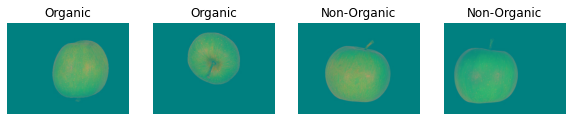

In [ ]:
import matplotlib.pyplot as plt   ## it;s better to see the images at the first to make sure, they read correctly
from matplotlib.pyplot import imshow

# Display 3 images
plt.figure(figsize=(10,3))
plt.subplot(141)
plt.imshow(images[42,:,:,:])
plt.title("Organic")
plt.axis("off")
plt.subplot(142)
plt.imshow(images[72,:,:,:])
plt.title("Organic")
plt.axis("off")
###############################
plt.subplot(143)
plt.imshow(images[377,:,:,:])
plt.title("Non-Organic")
plt.axis("off")
plt.subplot(144)
plt.imshow(images[406,:,:,:])
plt.title("Non-Organic")
plt.axis("off")
# show the plot
plt.show()

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import plotly.figure_factory as ff

# Check the distribution of L values
y_means = []
y_stds = []
y_skews = []
for i in range(len(images)):
  y_mean = np.mean(images[i][:, :, 0])
  y_means.append(y_mean)

  y_std = np.std(images[i][:, :, 0])
  y_stds.append(y_std)

  y_skew = skew(images[i][:, :, 0],axis=None, bias=True)
  y_skews.append(y_skew)

# Check the distribution of s values
Cb_means = []
Cb_stds = []
Cb_skews = []
for i in range(len(images)):
  Cb_mean = np.mean(images[i][:, :, 1])
  Cb_means.append(Cb_mean)

  Cb_std = np.std(images[i][:, :, 1])
  Cb_stds.append(Cb_std)

  Cb_skew = skew(images[i][:, :, 1],axis=None, bias=True)
  Cb_skews.append(Cb_skew)

# Check the distribution of b values
Cr_means = []
Cr_stds = []
Cr_skews = []
for i in range(len(images)):
  Cr_mean = np.mean(images[i][:, :, 2])
  Cr_means.append(Cr_mean)

  Cr_std = np.std(images[i][:, :, 2])
  Cr_stds.append(Cr_std)

  Cr_skew = skew(images[i][:, :, 2],axis=None, bias=True)
  Cr_skews.append(Cr_skew)

# Plotting the histogram
fig = ff.create_distplot([y_means, Cb_means, Cr_means], group_labels=["y", "Cb", "Cr"], colors=['red', 'green', 'blue'])
fig.update_layout(showlegend=True, template="simple_white")
fig.update_layout(title_text='Distribution of channel values across images in yCbCr')
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig.data[1].marker.line.color = 'rgb(0, 0, 0)'
fig.data[1].marker.line.width = 0.5
fig.data[2].marker.line.color = 'rgb(0, 0, 0)'
fig.data[2].marker.line.width = 0.5
fig

In [ ]:
yCbCr_color_moment=pd.DataFrame()
yCbCr_color_moment['y_means']=y_means
yCbCr_color_moment['y_stds']=y_stds
yCbCr_color_moment['y_skews']=y_skews
yCbCr_color_moment['Cb_means']=Cb_means
yCbCr_color_moment['Cb_stds']=Cb_stds
yCbCr_color_moment['Cb_skew']=Cb_skews
yCbCr_color_moment['Cr_means']=Cr_means
yCbCr_color_moment['Cr_stds']=Cr_stds
yCbCr_color_moment['Cr_skews']=Cr_skews
yCbCr_color_moment

,y_means,y_stds,y_skews,Cb_means,Cb_stds,Cb_skew,Cr_means,Cr_stds,Cr_skews
0,11.438695,24.998963,2.127799,132.947663,10.700680,1.875738,126.243507,4.087062,-2.505674
1,12.754696,27.857373,2.110956,132.416201,9.768352,2.025270,126.752070,3.408938,-4.848016
2,19.392205,36.983033,1.669324,135.143435,13.132808,1.402742,122.905460,9.662195,-1.553408
3,15.068800,30.412150,1.754354,134.471372,13.145086,1.691062,125.333292,5.678981,-1.972291
4,25.544971,47.773838,1.558368,134.634203,12.219863,1.448965,120.241734,14.384391,-1.453193
...,...,...,...,...,...,...,...,...,...
545,29.602659,47.197817,1.313901,138.963705,17.347696,1.136735,120.243819,13.743591,-1.979832
546,30.150135,48.362706,1.105416,135.368382,12.354260,1.248964,123.795774,7.277820,-1.460844
547,22.459108,39.520437,1.561281,137.674337,16.589489,1.289039,122.667048,9.832876,-1.680600
548,26.483572,44.517505,1.499182,140.197578,19.833728,1.194103,120.664875,13.077840,-1.728066


## Concat all the color features

In [ ]:
RGB_color_moment = RGB_color_moment.reset_index(drop=True)
HSV_color_moment=HSV_color_moment.reset_index(drop=True)
LAB_color_moment = LAB_color_moment.reset_index(drop=True)
#yCbCr_color_moment=yCbCr_color_moment.reset_index(drop=True)
color_moment=pd.concat([RGB_color_moment,HSV_color_moment,LAB_color_moment],axis=1)
color_moment

,r_means,r_stds,r_skews,g_means,g_stds,g_skew,b_means,b_stds,b_skews,h_means,...,v_skews,L_means,L_stds,L_skews,a_means,a_stds,a_skew,b_means,b_stds,b_skews
0,18.369419,38.955566,1.863447,8.505782,19.681548,2.570421,8.342998,18.850259,2.392047,15.847035,...,1.863420,12.347349,27.035139,2.108616,132.420583,9.587425,1.844548,130.272533,5.252730,2.303098
1,18.940506,40.277912,1.875848,10.028714,23.035377,2.507056,10.557683,23.250328,2.209536,28.540984,...,1.875807,13.645206,29.875444,2.103048,132.020417,9.031144,2.008417,129.514199,4.010426,4.055792
2,29.398141,54.386609,1.486648,16.044873,31.688401,1.838579,10.369719,21.174706,2.136762,4.314908,...,1.486611,21.184533,40.261257,1.629390,133.191182,9.716985,1.481675,133.925228,11.100745,1.473726
3,24.133557,48.161234,1.661953,11.362515,23.565203,1.944298,10.351159,21.147165,1.923715,10.242874,...,1.661901,16.404053,33.179293,1.743310,133.477540,11.089692,1.646380,131.305498,6.972446,1.898114
4,34.835435,63.884729,1.435456,23.477816,44.640683,1.654623,11.804856,23.769170,2.013067,5.202016,...,1.435404,27.789886,51.801038,1.524548,131.439832,7.032363,1.863243,136.331519,15.306170,1.393545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,44.953855,68.927533,1.084107,24.440060,41.675795,1.671868,15.866611,26.772964,1.607057,5.477228,...,1.083974,32.526267,51.497294,1.266481,135.791880,13.543460,1.174920,136.779156,14.697663,1.562002
546,40.469010,64.740755,1.076979,26.330934,42.598203,1.171480,22.716043,36.653344,1.151662,3.256963,...,1.077058,32.219532,51.631000,1.090119,133.365016,9.174672,1.245275,132.502500,7.808743,1.443229
547,36.005928,61.030987,1.332269,17.383412,32.483436,1.846628,13.022022,24.699250,1.979134,8.196337,...,1.332341,24.770302,43.158731,1.491822,135.550966,13.040244,1.311348,134.448365,11.579939,1.498324
548,43.580101,70.251233,1.243139,20.296096,36.734738,1.889524,13.496324,24.322950,1.815504,5.896822,...,1.243230,29.438611,48.920252,1.419265,137.215793,15.077575,1.200432,136.687509,14.892080,1.443759


In [ ]:
normalized_color_moment=(color_moment-color_moment.min())/(color_moment.max()-color_moment.min())
normalized_color_moment

,r_means,r_stds,r_skews,g_means,g_stds,g_skew,b_means,b_stds,b_skews,h_means,...,v_skews,L_means,L_stds,L_skews,a_means,a_stds,a_skew,b_means,b_stds,b_skews
0,0.062047,0.104306,0.648646,0.055540,0.064870,0.649231,0.089498,0.122492,0.492454,0.237875,...,0.648788,0.060584,0.085519,0.716830,0.370628,0.357565,0.747464,0.086465,0.119645,0.423897
1,0.075017,0.130342,0.655915,0.095985,0.127893,0.623246,0.166362,0.254336,0.430429,0.460235,...,0.656049,0.093650,0.140893,0.713640,0.341699,0.324589,0.796341,0.037318,0.066136,0.950805
2,0.312521,0.408129,0.427776,0.255757,0.290494,0.349115,0.159838,0.192142,0.405697,0.035866,...,0.427897,0.285737,0.343370,0.442219,0.426336,0.365246,0.639230,0.323195,0.371532,0.174565
3,0.192957,0.285557,0.530535,0.131407,0.137849,0.392468,0.159194,0.191317,0.333296,0.139707,...,0.530654,0.163940,0.205303,0.507498,0.447037,0.446621,0.688356,0.153411,0.193717,0.302148
4,0.436008,0.595138,0.397768,0.453154,0.533883,0.273677,0.209647,0.269883,0.363661,0.051406,...,0.397878,0.454028,0.568344,0.382141,0.299728,0.206099,0.753040,0.479146,0.552669,0.150460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,0.665809,0.694426,0.191817,0.478709,0.478169,0.280749,0.350616,0.359888,0.225683,0.056227,...,0.191865,0.574702,0.562422,0.234261,0.614344,0.592082,0.547735,0.508157,0.526459,0.201103
546,0.563953,0.611992,0.187638,0.528925,0.495502,0.075548,0.588335,0.655944,0.070922,0.017334,...,0.187810,0.566887,0.565029,0.133200,0.438902,0.333097,0.568719,0.230989,0.229738,0.165397
547,0.462591,0.538950,0.337283,0.291305,0.305433,0.352415,0.251890,0.297752,0.352129,0.103857,...,0.337461,0.377095,0.399857,0.363388,0.596928,0.562251,0.588427,0.357100,0.392172,0.181960
548,0.634609,0.720488,0.285037,0.368657,0.385320,0.370006,0.268352,0.286476,0.296521,0.063577,...,0.285223,0.496034,0.512181,0.321811,0.717281,0.683026,0.555344,0.502218,0.534833,0.165556


In [ ]:
normalized_color_moment = normalized_color_moment.reset_index(drop=True)
images_name=images_name.reset_index(drop=True)
color_moment=pd.concat([normalized_color_moment,images_name],axis=1)
color_moment

,r_means,r_stds,r_skews,g_means,g_stds,g_skew,b_means,b_stds,b_skews,h_means,...,L_stds,L_skews,a_means,a_stds,a_skew,b_means,b_stds,b_skews,class,images_name
0,0.062047,0.104306,0.648646,0.055540,0.064870,0.649231,0.089498,0.122492,0.492454,0.237875,...,0.085519,0.716830,0.370628,0.357565,0.747464,0.086465,0.119645,0.423897,0,12.jpg
1,0.075017,0.130342,0.655915,0.095985,0.127893,0.623246,0.166362,0.254336,0.430429,0.460235,...,0.140893,0.713640,0.341699,0.324589,0.796341,0.037318,0.066136,0.950805,0,11.jpg
2,0.312521,0.408129,0.427776,0.255757,0.290494,0.349115,0.159838,0.192142,0.405697,0.035866,...,0.343370,0.442219,0.426336,0.365246,0.639230,0.323195,0.371532,0.174565,0,23.jpg
3,0.192957,0.285557,0.530535,0.131407,0.137849,0.392468,0.159194,0.191317,0.333296,0.139707,...,0.205303,0.507498,0.447037,0.446621,0.688356,0.153411,0.193717,0.302148,0,25.jpg
4,0.436008,0.595138,0.397768,0.453154,0.533883,0.273677,0.209647,0.269883,0.363661,0.051406,...,0.568344,0.382141,0.299728,0.206099,0.753040,0.479146,0.552669,0.150460,0,27.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,0.665809,0.694426,0.191817,0.478709,0.478169,0.280749,0.350616,0.359888,0.225683,0.056227,...,0.562422,0.234261,0.614344,0.592082,0.547735,0.508157,0.526459,0.201103,1,260.jpg
546,0.563953,0.611992,0.187638,0.528925,0.495502,0.075548,0.588335,0.655944,0.070922,0.017334,...,0.565029,0.133200,0.438902,0.333097,0.568719,0.230989,0.229738,0.165397,1,248.jpg
547,0.462591,0.538950,0.337283,0.291305,0.305433,0.352415,0.251890,0.297752,0.352129,0.103857,...,0.399857,0.363388,0.596928,0.562251,0.588427,0.357100,0.392172,0.181960,1,235.jpg
548,0.634609,0.720488,0.285037,0.368657,0.385320,0.370006,0.268352,0.286476,0.296521,0.063577,...,0.512181,0.321811,0.717281,0.683026,0.555344,0.502218,0.534833,0.165556,1,237.jpg


In [ ]:
color_moment.to_csv('/content/gdrive/MyDrive/thesis-article-2023/classic/evaluation result/apple-RGB-JUST RGB(without ycbcr).csv')

# 5- Read RGB images and convert to gray  and extract color-moment features

In [ ]:
#Resize images to
#SIZE = 128      ##resize all the images into same size
from skimage import color
#Capture images and labels into arrays.
#Start by creating empty lists.
images = []
labels = []
#for directory_path in glob.glob("cell_images/train/*"):
for directory_path in glob.glob("/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/*"):
    label = directory_path.split("\\")[-1]
    path = os.path.normpath(label)
    print(path)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path,0) #Reading gray images
        #img = cv2.resize(img, (340, 420)) #Resize images
        #img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
        #img = 0.2989 * R + 0.5870 * G + 0.1140 * B
        images.append(img)
        labels.append(label)
        ## above codes gives us a list of array

images = np.array(images)
labels = np.array(labels)

/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/12.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/11.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/23.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/25.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/27.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/14.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/5.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/35.jpg
/content/gdrive/MyDrive/thesis/total-dataset(after segmentation)/RGB/apple/total/organic/26.jpg
/content/gdrive/MyDrive/thesis/total-dataset(aft

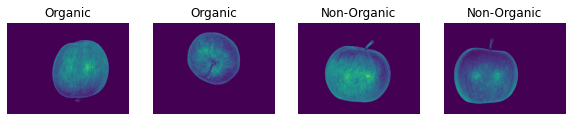

In [ ]:
import matplotlib.pyplot as plt   ## it;s better to see the images at the first to make sure, they read correctly
from matplotlib.pyplot import imshow

# Display 3 images
plt.figure(figsize=(10,3))
plt.subplot(141)
plt.imshow(images[42,:,:])
plt.title("Organic")
plt.axis("off")
plt.subplot(142)
plt.imshow(images[72,:,:])
plt.title("Organic")
plt.axis("off")
###############################
plt.subplot(143)
plt.imshow(images[377,:,:])
plt.title("Non-Organic")
plt.axis("off")
plt.subplot(144)
plt.imshow(images[406,:,:])
plt.title("Non-Organic")
plt.axis("off")
# show the plot
plt.show()

In [ ]:
# FEATURE EXTRACTOR function
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):  #iterate through each file
        #print(image)

        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.

        img = dataset[image, :,:]
    ################################################################
    #START ADDING DATA TO THE DATAFRAME
        #df['Index']=i

         #Full image
        #GLCM = greycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
        GLCM = greycomatrix(img, [1], [0])
        GLCM_Energy = greycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = greycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr
        #GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
        #df['Diss_sim'] = GLCM_diss
        GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom
        #GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        #df['Contrast'] = GLCM_contr


        GLCM2 = greycomatrix(img, [3], [0])
        GLCM_Energy2 = greycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = greycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2
        GLCM_diss2 = greycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2
        GLCM_hom2 = greycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2
        #GLCM_contr2 = greycoprops(GLCM2, 'contrast')[0]
        #df['Contrast2'] = GLCM_contr2

        GLCM3 = greycomatrix(img, [5], [0])
        GLCM_Energy3 = greycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = greycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3
        GLCM_diss3 = greycoprops(GLCM3, 'dissimilarity')[0]
        df['Diss_sim3'] = GLCM_diss3
        GLCM_hom3 = greycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3
        GLCM_contr3 = greycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3

        GLCM4 = greycomatrix(img, [0], [np.pi/4])
        GLCM_Energy4 = greycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        #GLCM_corr4 = greycoprops(GLCM4, 'correlation')[0]
        #df['Corr4'] = GLCM_corr4
        #GLCM_diss4 = greycoprops(GLCM4, 'dissimilarity')[0]
        #df['Diss_sim4'] = GLCM_diss4
        GLCM_hom4 = greycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4
        #GLCM_contr4 = greycoprops(GLCM4, 'contrast')[0]
        #df['Contrast4'] = GLCM_contr4

        GLCM5 = greycomatrix(img, [0], [np.pi/2])
        GLCM_Energy5 = greycoprops(GLCM5, 'energy')[0]
        df['Energy5'] = GLCM_Energy5
        #GLCM_corr5 = greycoprops(GLCM5, 'correlation')[0]
        #df['Corr5'] = GLCM_corr5
        #GLCM_diss5 = greycoprops(GLCM5, 'dissimilarity')[0]
        #df['Diss_sim5'] = GLCM_diss5
        GLCM_hom5 = greycoprops(GLCM5, 'homogeneity')[0]
        df['Homogen5'] = GLCM_hom5
        #GLCM_contr5 = greycoprops(GLCM5, 'contrast')[0]
        #df['Contrast5'] = GLCM_contr5

        #Add more filters as needed
        entropy = shannon_entropy(img)


           # haralick texture
       # haralick = mahotas.features.haralick(img).mean(axis=0)   ## Length of values (13) does not match length of index (1)
        #df['haralick']=haralick


          # hog
        from skimage.feature import hog
        fd, hog_feature = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)
        hog_feature= hog_feature.reshape(-1)
        df['hog_feature']=hog_feature.mean(axis=0)

          # HuMoments
        feature = cv2.HuMoments(cv2.moments(img)).flatten()
        feature=feature.mean(axis=0)   ### i don't know it's true to use min or not, it gives 7 number for an image so i have to use mean
        df['HuMoments']=feature

         # Gabor filter
        gaborFilt_real,gaborFilt_imag = gabor(img,frequency=0.6)
        gaborFilt = (gaborFilt_real**2+gaborFilt_imag**2)//2
        gabor_hist,_ = np.histogram(gaborFilt,8)
        gabor_hist = np.array(gabor_hist,dtype=float)
        gabor_prob = np.divide(gabor_hist,np.sum(gabor_hist))
        gabor_energy = np.nansum(gabor_prob**2)
        df['gabor_energy ']=gabor_energy
        gabor_entropy = -np.nansum(np.multiply(gabor_prob,np.log2(gabor_prob)))
        df['gabor_entropy']=gabor_entropy

            # LBP
        #feat_lbp = local_binary_pattern(img,5,2,'uniform')
        #lbp_hist,_ = np.histogram(feat_lbp,8)
        #lbp_hist = np.array(lbp_hist,dtype=float)
        #lbp_prob = np.divide(lbp_hist,np.sum(lbp_hist))
        #lbp_energy = np.nansum(lbp_prob**2)
        #df['lbp_energy']=lbp_energy
        #lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))
        #df['lbp_entropy']=lbp_entropy



       # df['median']=np.median(img)
        df['Mean']=np.mean(img)
        df['var']= np.var(img)
        #df['std']=np.std(img)
        df['skew']=skew(img,axis=None, bias=True)
        df['kurtosis']=kurtosis(img,axis=None, bias=True)


#######
        #i=i+1

        #Append features from current image to the dataset
        image_dataset = image_dataset.append(df)

    return image_dataset



In [ ]:
#Extract features from training images
image_features = feature_extractor(images)

image_features

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation:

Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.

/usr/local/lib/python3.8/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation:

Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.

/usr/local/lib/python3.8/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation:

Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.

/usr/local/lib/python3.8/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation:

Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.

/usr/local/lib/python3.8/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation:



,Energy,Corr,Homogen,Energy2,Corr2,Diss_sim2,Homogen2,Energy3,Corr3,Diss_sim3,...,Energy5,Homogen5,hog_feature,HuMoments,gabor_energy,gabor_entropy,Mean,var,skew,kurtosis
0,0.796029,0.951632,0.820738,0.794226,0.916908,2.998922,0.813177,0.792307,0.898105,3.361335,...,0.800831,1.0,0.424984,0.000358,0.914316,0.349102,11.425371,625.299662,2.129218,3.870174
0,0.797203,0.967610,0.836709,0.795324,0.934584,2.501420,0.821179,0.793227,0.912783,3.024451,...,0.801938,1.0,0.338072,0.000340,0.916397,0.332437,12.742648,776.365881,2.111248,3.684314
0,0.748196,0.971945,0.777216,0.746210,0.951232,3.815790,0.767765,0.743715,0.938827,4.323358,...,0.753652,1.0,0.513002,0.000249,0.824837,0.635084,19.376443,1368.348470,1.669428,1.459355
0,0.775606,0.984229,0.834800,0.773641,0.961941,2.110243,0.808632,0.771039,0.946015,2.651658,...,0.780911,1.0,0.260366,0.000295,0.920471,0.297919,15.052625,925.365141,1.754305,1.658590
0,0.745152,0.983413,0.774051,0.743163,0.967116,4.173041,0.763022,0.740589,0.954516,5.025646,...,0.751179,1.0,0.555502,0.000196,0.743685,0.885583,25.526947,2283.407458,1.558659,0.911340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.666702,0.992018,0.735004,0.663902,0.974199,3.710753,0.702327,0.661100,0.961218,4.710888,...,0.672584,1.0,0.477628,0.000220,0.735386,0.853651,29.588018,2228.606156,1.314007,0.417576
0,0.697717,0.993180,0.784060,0.695047,0.976366,2.784262,0.746624,0.692207,0.962203,3.588874,...,0.703845,1.0,0.347561,0.000206,0.687104,0.921071,30.138508,2339.679524,1.105446,-0.469550
0,0.709629,0.990306,0.773827,0.706951,0.969066,3.086126,0.743541,0.704336,0.952698,3.964882,...,0.714752,1.0,0.386111,0.000247,0.826957,0.598448,22.446140,1562.429647,1.561127,1.235714
0,0.678914,0.989709,0.744436,0.676067,0.969260,3.733735,0.714327,0.673349,0.955224,4.686066,...,0.685039,1.0,0.453696,0.000225,0.766453,0.780513,26.468014,1982.792306,1.499269,1.081033


# Normilize the feature

In [ ]:
normalized_image_features=(image_features-image_features.min())/(image_features.max()-image_features.min())
normalized_image_features

,Energy,Corr,Homogen,Energy2,Corr2,Diss_sim2,Homogen2,Energy3,Corr3,Diss_sim3,...,Energy5,Homogen5,hog_feature,HuMoments,gabor_energy,gabor_entropy,Mean,var,skew,kurtosis
0,0.796806,0.288637,0.707760,0.796422,0.319549,0.334614,0.789821,0.797410,0.328771,0.259993,...,0.797609,0.6,0.414191,0.667184,0.875027,0.152365,0.061117,0.043691,0.704397,0.665558
0,0.801061,0.534198,0.767488,0.800372,0.485920,0.235805,0.820438,0.800692,0.448013,0.201072,...,0.801681,0.6,0.282390,0.611457,0.880176,0.138804,0.097754,0.079340,0.694171,0.639070
0,0.623436,0.600818,0.544998,0.623697,0.642624,0.496853,0.616068,0.623982,0.659599,0.428252,...,0.624037,0.6,0.547669,0.326857,0.653495,0.385081,0.282256,0.219039,0.442764,0.321983
0,0.722784,0.789594,0.760348,0.722374,0.743416,0.158113,0.772432,0.721503,0.717993,0.135870,...,0.724324,0.4,0.164550,0.471664,0.890263,0.110715,0.162000,0.114502,0.491061,0.350377
0,0.612402,0.777063,0.533162,0.612736,0.792132,0.567807,0.597921,0.612824,0.787055,0.551084,...,0.614938,0.6,0.612120,0.163003,0.452580,0.588924,0.453317,0.434979,0.379733,0.243883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.328061,0.909297,0.387135,0.327615,0.858793,0.475992,0.365697,0.329122,0.841508,0.496032,...,0.325789,0.4,0.494025,0.237576,0.432035,0.562939,0.566266,0.422047,0.240519,0.173515
0,0.440475,0.927166,0.570596,0.439652,0.879190,0.291980,0.535182,0.440144,0.849504,0.299790,...,0.440800,1.0,0.296780,0.193179,0.312498,0.617803,0.581576,0.448258,0.121842,0.047088
0,0.483651,0.882987,0.532325,0.482473,0.810485,0.351934,0.523385,0.483436,0.772292,0.365554,...,0.480926,0.6,0.355239,0.320161,0.658743,0.355269,0.367632,0.264839,0.381137,0.290111
0,0.372325,0.873820,0.422410,0.371376,0.812310,0.480556,0.411610,0.372839,0.792808,0.491690,...,0.371612,0.6,0.457732,0.252753,0.508950,0.503424,0.479491,0.364038,0.345938,0.268067


In [ ]:
## concat the color feature df and gray feature df
color_moment = color_moment.reset_index(drop=True)
normalized_image_features=normalized_image_features.reset_index(drop=True)
Total_feature=pd.concat([normalized_image_features,color_moment],axis=1)
Total_feature

,Energy,Corr,Homogen,Energy2,Corr2,Diss_sim2,Homogen2,Energy3,Corr3,Diss_sim3,...,L_stds,L_skews,a_means,a_stds,a_skew,b_means,b_stds,b_skews,class,images_name
0,0.796806,0.288637,0.707760,0.796422,0.319549,0.334614,0.789821,0.797410,0.328771,0.259993,...,0.085519,0.716830,0.370628,0.357565,0.747464,0.086465,0.119645,0.423897,0,12.jpg
1,0.801061,0.534198,0.767488,0.800372,0.485920,0.235805,0.820438,0.800692,0.448013,0.201072,...,0.140893,0.713640,0.341699,0.324589,0.796341,0.037318,0.066136,0.950805,0,11.jpg
2,0.623436,0.600818,0.544998,0.623697,0.642624,0.496853,0.616068,0.623982,0.659599,0.428252,...,0.343370,0.442219,0.426336,0.365246,0.639230,0.323195,0.371532,0.174565,0,23.jpg
3,0.722784,0.789594,0.760348,0.722374,0.743416,0.158113,0.772432,0.721503,0.717993,0.135870,...,0.205303,0.507498,0.447037,0.446621,0.688356,0.153411,0.193717,0.302148,0,25.jpg
4,0.612402,0.777063,0.533162,0.612736,0.792132,0.567807,0.597921,0.612824,0.787055,0.551084,...,0.568344,0.382141,0.299728,0.206099,0.753040,0.479146,0.552669,0.150460,0,27.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,0.328061,0.909297,0.387135,0.327615,0.858793,0.475992,0.365697,0.329122,0.841508,0.496032,...,0.562422,0.234261,0.614344,0.592082,0.547735,0.508157,0.526459,0.201103,1,260.jpg
546,0.440475,0.927166,0.570596,0.439652,0.879190,0.291980,0.535182,0.440144,0.849504,0.299790,...,0.565029,0.133200,0.438902,0.333097,0.568719,0.230989,0.229738,0.165397,1,248.jpg
547,0.483651,0.882987,0.532325,0.482473,0.810485,0.351934,0.523385,0.483436,0.772292,0.365554,...,0.399857,0.363388,0.596928,0.562251,0.588427,0.357100,0.392172,0.181960,1,235.jpg
548,0.372325,0.873820,0.422410,0.371376,0.812310,0.480556,0.411610,0.372839,0.792808,0.491690,...,0.512181,0.321811,0.717281,0.683026,0.555344,0.502218,0.534833,0.165556,1,237.jpg


In [ ]:
color_moment

,r_means,r_stds,r_skews,g_means,g_stds,g_skew,b_means,b_stds,b_skews,h_means,...,L_stds,L_skews,a_means,a_stds,a_skew,b_means,b_stds,b_skews,class,images_name
0,0.062047,0.104306,0.648646,0.055540,0.064870,0.649231,0.089498,0.122492,0.492454,0.237875,...,0.085519,0.716830,0.370628,0.357565,0.747464,0.086465,0.119645,0.423897,0,12.jpg
1,0.075017,0.130342,0.655915,0.095985,0.127893,0.623246,0.166362,0.254336,0.430429,0.460235,...,0.140893,0.713640,0.341699,0.324589,0.796341,0.037318,0.066136,0.950805,0,11.jpg
2,0.312521,0.408129,0.427776,0.255757,0.290494,0.349115,0.159838,0.192142,0.405697,0.035866,...,0.343370,0.442219,0.426336,0.365246,0.639230,0.323195,0.371532,0.174565,0,23.jpg
3,0.192957,0.285557,0.530535,0.131407,0.137849,0.392468,0.159194,0.191317,0.333296,0.139707,...,0.205303,0.507498,0.447037,0.446621,0.688356,0.153411,0.193717,0.302148,0,25.jpg
4,0.436008,0.595138,0.397768,0.453154,0.533883,0.273677,0.209647,0.269883,0.363661,0.051406,...,0.568344,0.382141,0.299728,0.206099,0.753040,0.479146,0.552669,0.150460,0,27.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,0.665809,0.694426,0.191817,0.478709,0.478169,0.280749,0.350616,0.359888,0.225683,0.056227,...,0.562422,0.234261,0.614344,0.592082,0.547735,0.508157,0.526459,0.201103,1,260.jpg
546,0.563953,0.611992,0.187638,0.528925,0.495502,0.075548,0.588335,0.655944,0.070922,0.017334,...,0.565029,0.133200,0.438902,0.333097,0.568719,0.230989,0.229738,0.165397,1,248.jpg
547,0.462591,0.538950,0.337283,0.291305,0.305433,0.352415,0.251890,0.297752,0.352129,0.103857,...,0.399857,0.363388,0.596928,0.562251,0.588427,0.357100,0.392172,0.181960,1,235.jpg
548,0.634609,0.720488,0.285037,0.368657,0.385320,0.370006,0.268352,0.286476,0.296521,0.063577,...,0.512181,0.321811,0.717281,0.683026,0.555344,0.502218,0.534833,0.165556,1,237.jpg


In [ ]:
Total_feature.to_csv('/content/gdrive/MyDrive/thesis-article-2023/classic/evaluation result/apple-RGB-TOTAL(RGB+texture)(without ycbcr).csv')

# Read images name and add into the feature's DF

In [ ]:
images_name=pd.DataFrame()

path=Organic_DATADIR
Organic_filenames = [os.path.basename(os.path.join(path, x)) for x in os.listdir(path) if '.png' in x or '.jpg' in x]
df1 = pd.DataFrame()
df1['class'] = pd.Series([0 for x in range(len(Organic_filenames))])
df1['images_name']=Organic_filenames

path=Non_Organic_DATADIR
Non_organic_filenames = [os.path.basename(os.path.join(path, x)) for x in os.listdir(path) if '.png' in x or '.jpg' in x]
df2 = pd.DataFrame()
df2['class'] = pd.Series([1 for x in range(len(Non_organic_filenames))])
df2['images_name']=Non_organic_filenames


images_name=pd.concat([df1,df2],axis=0)
images_name

,class,images_name
0,0,12.jpg
1,0,11.jpg
2,0,23.jpg
3,0,25.jpg
4,0,27.jpg
...,...,...
263,1,260.jpg
264,1,248.jpg
265,1,235.jpg
266,1,237.jpg


In [ ]:
normalized_image_features = normalized_image_features.reset_index(drop=True)
images_name=images_name.reset_index(drop=True)
normalized_Total_feature=pd.concat([images_name,normalized_image_features],axis=1)

normalized_Total_feature

,class,images_name,Energy,Corr,Homogen,Energy2,Corr2,Diss_sim2,Homogen2,Energy3,...,Energy5,Homogen5,hog_feature,HuMoments,gabor_energy,gabor_entropy,Mean,var,skew,kurtosis
0,0,12.jpg,0.796806,0.288637,0.707760,0.796422,0.319549,0.334614,0.789821,0.797410,...,0.797609,0.6,0.414191,0.667184,0.875027,0.152365,0.061117,0.043691,0.704397,0.665558
1,0,11.jpg,0.801061,0.534198,0.767488,0.800372,0.485920,0.235805,0.820438,0.800692,...,0.801681,0.6,0.282390,0.611457,0.880176,0.138804,0.097754,0.079340,0.694171,0.639070
2,0,23.jpg,0.623436,0.600818,0.544998,0.623697,0.642624,0.496853,0.616068,0.623982,...,0.624037,0.6,0.547669,0.326857,0.653495,0.385081,0.282256,0.219039,0.442764,0.321983
3,0,25.jpg,0.722784,0.789594,0.760348,0.722374,0.743416,0.158113,0.772432,0.721503,...,0.724324,0.4,0.164550,0.471664,0.890263,0.110715,0.162000,0.114502,0.491061,0.350377
4,0,27.jpg,0.612402,0.777063,0.533162,0.612736,0.792132,0.567807,0.597921,0.612824,...,0.614938,0.6,0.612120,0.163003,0.452580,0.588924,0.453317,0.434979,0.379733,0.243883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,1,260.jpg,0.328061,0.909297,0.387135,0.327615,0.858793,0.475992,0.365697,0.329122,...,0.325789,0.4,0.494025,0.237576,0.432035,0.562939,0.566266,0.422047,0.240519,0.173515
546,1,248.jpg,0.440475,0.927166,0.570596,0.439652,0.879190,0.291980,0.535182,0.440144,...,0.440800,1.0,0.296780,0.193179,0.312498,0.617803,0.581576,0.448258,0.121842,0.047088
547,1,235.jpg,0.483651,0.882987,0.532325,0.482473,0.810485,0.351934,0.523385,0.483436,...,0.480926,0.6,0.355239,0.320161,0.658743,0.355269,0.367632,0.264839,0.381137,0.290111
548,1,237.jpg,0.372325,0.873820,0.422410,0.371376,0.812310,0.480556,0.411610,0.372839,...,0.371612,0.6,0.457732,0.252753,0.508950,0.503424,0.479491,0.364038,0.345938,0.268067


In [ ]:

#normalized_Total_feature["class"] = np.where(normalized_Total_feature["class"] == 0, "non_organic", "organic")
#normalized_Total_feature

## save the total DF

In [ ]:
normalized_Total_feature.to_csv('gdrive/MyDrive/thesis-article-2023/classic/evaluation result/apple-RGB-TOTAL(RGB+texture)(without ycbcr).csv')

In [ ]:
y_data=normalized_Total_feature['class']  #label
x_data=normalized_Total_feature.loc[:, normalized_Total_feature.columns != 'images_name']
x_data=x_data.loc[:, x_data.columns != 'class']   #feature dataframe

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data ,test_size = 0.3, shuffle=True)

In [ ]:
print('x_train.shape:', x_train.shape)
print('y_train.shape:', y_train.shape)
print('x_test.shape:', x_test.shape)
print('y_test.shape:', y_test.shape)

x_train.shape: (385, 24)
y_train.shape: (385,)
x_test.shape: (165, 24)
y_test.shape: (165,)


In [ ]:
import sklearn as sk
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(30, 2), random_state=1)
NN.fit(x_train, y_train)
NN.predict(x_test)
round(NN.score(x_test,y_test), 2)

0.98

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [ ]:
#Classifiers
classifiers = [ LinearDiscriminantAnalysis(),
               LogisticRegression(),
                KNeighborsClassifier(30),
                DecisionTreeClassifier(),
                RandomForestClassifier(),
                AdaBoostClassifier(),
                LogisticRegression(),
                SVC(),
                GaussianNB(),
                XGBClassifier(),

                ]

In [ ]:
k = 5
preds = pd.DataFrame(index=[*range(k)])

for cls in classifiers:
    scores = cross_val_score(cls, x_train, y_train, cv=k, scoring="accuracy")
    preds[type(cls).__name__] = scores

preds = preds.append(preds.mean(axis=0), ignore_index = True)   ## the last row is the mean of each column
preds

,LinearDiscriminantAnalysis,LogisticRegression,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,SVC,GaussianNB,XGBClassifier
0,0.987013,0.870130,0.857143,0.844156,0.909091,0.922078,0.909091,0.805195,0.922078
1,0.987013,0.961039,0.948052,0.961039,0.987013,1.000000,0.974026,0.831169,0.974026
2,1.000000,0.948052,0.935065,0.935065,0.948052,0.987013,0.948052,0.883117,0.948052
3,0.987013,0.948052,0.948052,0.961039,0.987013,0.974026,0.961039,0.870130,0.974026
4,1.000000,0.935065,0.935065,0.922078,0.922078,1.000000,0.948052,0.831169,0.987013
5,0.992208,0.932468,0.924675,0.924675,0.950649,0.976623,0.948052,0.844156,0.961039


In [ ]:

from sklearn.decomposition import PCA
def applyPCA(matt):
    pca = PCA(n_components = 0.95)
    pca.fit(matt)
    matt = pca.transform(matt)
    return matt

full_data_x = np.concatenate((x_train, x_test), axis=0)
full_data_y = np.concatenate((y_train,y_test), axis=0)
full_data_x = applyPCA(full_data_x)

print("X_train : ", full_data_x.shape ," ,  Y_train : ", full_data_y.shape)

######################### Split train+test #######################################
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(full_data_x, full_data_y, test_size = 0.20,random_state=2)

X_train :  (550, 4)  ,  Y_train :  (550,)


In [ ]:
#Classifiers
classifiers = [ LinearDiscriminantAnalysis(),
               LogisticRegression(),
                KNeighborsClassifier(30),
                DecisionTreeClassifier(),
                RandomForestClassifier(),
                AdaBoostClassifier(),
                LogisticRegression(),
                SVC(),
                GaussianNB(),
                XGBClassifier(),

                ]

In [ ]:
k = 5
preds = pd.DataFrame(index=[*range(k)])

for cls in classifiers:
    scores = cross_val_score(cls, x_train, y_train, cv=k, scoring="accuracy")
    preds[type(cls).__name__] = scores

preds = preds.append(preds.mean(axis=0), ignore_index = True)   ## the last row is the mean of each column
preds

,LinearDiscriminantAnalysis,LogisticRegression,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,SVC,GaussianNB,XGBClassifier
0,0.897727,0.897727,0.909091,0.886364,0.931818,0.920455,0.897727,0.897727,0.909091
1,0.943182,0.954545,0.965909,0.897727,0.977273,0.965909,0.954545,0.954545,0.954545
2,0.909091,0.897727,0.909091,0.852273,0.909091,0.897727,0.909091,0.886364,0.909091
3,0.943182,0.954545,0.943182,0.920455,0.954545,0.909091,0.931818,0.943182,0.943182
4,0.875000,0.909091,0.909091,0.897727,0.909091,0.897727,0.909091,0.886364,0.897727
5,0.913636,0.922727,0.927273,0.890909,0.936364,0.918182,0.920455,0.913636,0.922727


In [ ]:
import sklearn as sk
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 2), random_state=1)
NN.fit(x_train, y_train)
NN.predict(x_test)
round(NN.score(x_test,y_test), 2)

0.54